<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Quantum-Fourier-Transform-(QFT)" data-toc-modified-id="Quantum-Fourier-Transform-(QFT)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quantum Fourier Transform (QFT)</a></span><ul class="toc-item"><li><span><a href="#N-=-1" data-toc-modified-id="N-=-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>N = 1</a></span><ul class="toc-item"><li><span><a href="#Circuit" data-toc-modified-id="Circuit-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Circuit</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li><li><span><a href="#N-=-2" data-toc-modified-id="N-=-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>N = 2</a></span><ul class="toc-item"><li><span><a href="#Circuit" data-toc-modified-id="Circuit-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Circuit</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li><li><span><a href="#N-=-3" data-toc-modified-id="N-=-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>N = 3</a></span><ul class="toc-item"><li><span><a href="#Circuit" data-toc-modified-id="Circuit-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Circuit</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li><li><span><a href="#Generalization-for-any-N" data-toc-modified-id="Generalization-for-any-N-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Generalization for any N</a></span></li><li><span><a href="#N-=-4" data-toc-modified-id="N-=-4-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>N = 4</a></span><ul class="toc-item"><li><span><a href="#Circuit" data-toc-modified-id="Circuit-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Circuit</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li></ul></li></ul></div>

# Quantum Fourier Transform (QFT) 

[Reference](https://community.qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)

Fourier transform is a very important tool to signal processing. 

Here we will build a quantum version of a discrete fourier transform, this will be used in many quantum algorithms.

Discrete fourier transform is the map between two strings $F: (x_0, x_1, \dots, x_{N-1}) \rightarrow ((y_0, y_1, \dots, y_{N-1}))$.

\begin{equation}
F(x_k) = y_k = \frac{1}{\sqrt N} \sum_{l=0}^{N-1} x_l \omega_N^{lk}
\end{equation}

Where: $\omega_N^{lk} =  exp\left(2\pi i \frac{lk}{N}\right)$

Quantum Fourier transform does the same thing, but using quantum states: $F:\sum_{i=0}^{N-1} x_i\left| i \right> \rightarrow \sum_{i=0}^{N-1} y_i\left| i \right> $

\begin{equation}
F(x_k) = y_k = \frac{1}{\sqrt N} \sum_{l=0}^{N-1} x_l \omega_N^{lk}
\end{equation}

Where: $\omega_N^{lk} =  exp\left(2\pi i \frac{lk}{N}\right)$

This can be represented by an unitary matrix:
\begin{equation}
F = \frac{1}{\sqrt N} \sum_{x=0}^{N-1}\sum_{y=0}^{N-1} \omega_N^{lk}  \left| y \right> \left< x \right|
\end{equation}



To find the circuit representation of the Fourier transform we need to see how it works on $2^N$ qubits first:

\begin{equation}
\begin{split}
F\left(\left| m \right> _n\right) & = \frac{1}{\sqrt N} \sum_{k=0}^{N-1} \omega_N^{km} \left| k \right>_n \\
  & =  \frac{1}{\sqrt N} \sum_{k=0}^{N-1} exp\left( i \frac{2\pi}{N} mk \right) \left| k \right>_n  \\
  & =  \frac{1}{\sqrt N} \sum_{k_{n-1}=0}^{1} \dots \sum_{k_{0}=0}^{1} exp\left( i \frac{2\pi}{N} m \sum_{l=1}^n \frac{k_{n-l}}{2^l} \right) \left| k_{n-1} \dots k_0 \right>_n  \\
  & =  \frac{1}{\sqrt N} \sum_{k_{n-1}=0}^{1} \dots \sum_{k_{0}=0}^{1} \bigotimes_{l=1}^n exp\left( i \frac{2\pi}{N} m  \frac{k_{n-l}}{2^l} \right) \left| k_{n-l}\right>_n \\ 
  & =  \frac{1}{\sqrt N} \bigotimes_{l=1}^n \left[ \left| 0 \right> + exp\left( i \frac{2\pi m}{2^l} \right) \left| 1\right> \right]
\end{split}
\end{equation}
Now we use the binary representation of $\frac{m}{2^l}$: 
\begin{equation}
\begin{split}
\frac{m}{2^l} & = \sum_{p=1}^n m_{n-p} 2^{n-p-l}  = m_{n-1} 2^{n-1-l} + \dots + m_l 2^0 + \dots + m_0 2^{-l} & \equiv m_{n-1} \dots m_l . m_{l-1} \dots m_0 \\
 & = \sum_{p=1}^{n-l} m_{n-p} 2^{n-p-l} + \sum_{p=1}^{l} \frac{m_{l-p}}{2^l}  &
\end{split}
\end{equation}
Therefore:
\begin{equation}
	exp\left[ i \frac{2 \pi m}{2^l} \right] = exp\left[ i 2 \pi \sum_{p=1}^{n-l} m_{n-p} 2^{n-p-l} \right] exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right] = exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right]
\end{equation}
Now, we have that:
\begin{equation}
F(\left| m\right>_n) = \frac{1}{\sqrt{N}} \bigotimes_{l=1}^n \left[ \left| 0 \right> +exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right] \left| 1\right> \right]
\end{equation}

Consider first acting on 2 qubits(n=2):

\begin{equation}
\begin{split}
F(\left| m\right>_n) & =  \frac{1}{\sqrt{4}} \bigotimes_{l=1}^2 \left[ \left| 0 \right> +exp\left[i 2 \pi  \sum_{p=1}^{l} \frac{m_{l-p}}{2^l} \right] \left| 1\right> \right] \\
 & = \frac{1}{2} \left[ \left| 0 \right> +exp\left[i 2 \pi  0.m_0 \right] \left| 1\right>\right] \otimes \left[ \left| 0 \right> +exp\left[i 2 \pi  0.m_1m_0 \right] \left| 1\right>\right]
\end{split}
\end{equation}

Consider the following gate:

\begin{equation}
\begin{split}
R_k^{(0,1)} \left| m \right> \left| 0 \right> & =  & \left| 0 \right> \\
R_k^{(0,1)} \left| m \right> \left| 1 \right> & = & exp \left[ i 2 \pi \frac{m}{2^k} \right]   \left| 1 \right> 
\end{split}
\end{equation}

We can write the QFT as: 

\begin{equation}
F = SWAP[H^{(0)} R_2^{(0,1)} H^{(1)} \left| m \right>_2]
\end{equation}

Where the SWAP gate changes the order of the qubits. 

This can be easily generalized for N qubits as we can see below.

In [1]:
%matplotlib inline
import qiskit as Qsk
import numpy as np
import matplotlib.pyplot as plt

## N = 1

### Circuit

In [2]:
Q_Circuit = Qsk.QuantumCircuit(1)

In [3]:
Q_Circuit.h(0);

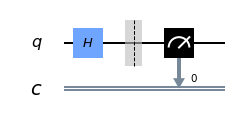

In [4]:
circ_meas = Qsk.QuantumCircuit(1, 1)
circ_meas.barrier(range(1))
circ_meas.measure(qubit=0,cbit=0)
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

### Simulation

In [5]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'1': 508, '0': 516}


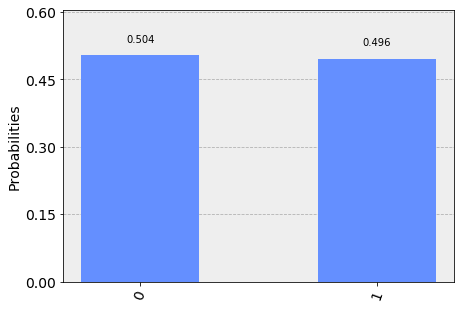

In [6]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## N = 2

### Circuit

In [17]:
Q_Circuit = Qsk.QuantumCircuit(2)

In [18]:
Q_Circuit.h(1);
Q_Circuit.cu1(np.pi,0,1);
Q_Circuit.barrier()
Q_Circuit.h(0);
Q_Circuit.barrier();
Q_Circuit.swap(0,1);

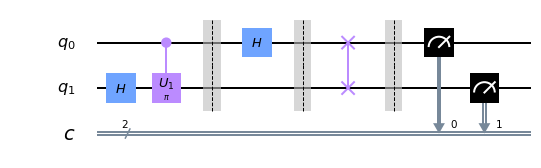

In [19]:
circ_meas = Qsk.QuantumCircuit(2, 2)
circ_meas.barrier();
circ_meas.measure(range(2),range(2));
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

### Simulation

In [20]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'11': 247, '01': 281, '10': 254, '00': 242}


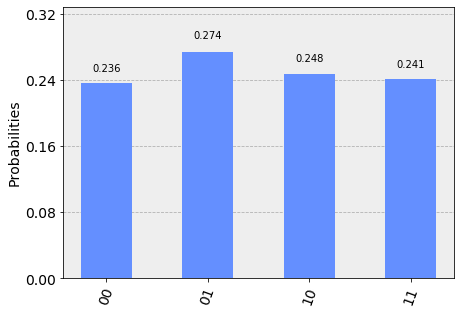

In [21]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## N = 3

### Circuit

In [34]:
def Rk(QC, Q_CONTROL, Q_TARGET, k, a):
    QC.cu1( a*2.0*np.pi/2.0**k, Q_CONTROL, Q_TARGET);

In [35]:
n = 3
Q_Circuit = Qsk.QuantumCircuit(n)

for i in range(n):
    m = n - 1 - i;
    Q_Circuit.h(m);
    for j in range(m, 0, -1):
        k = 2 + m - j;
        Rk(Q_Circuit, j-1, m, k, 1.0);
    Q_Circuit.barrier();

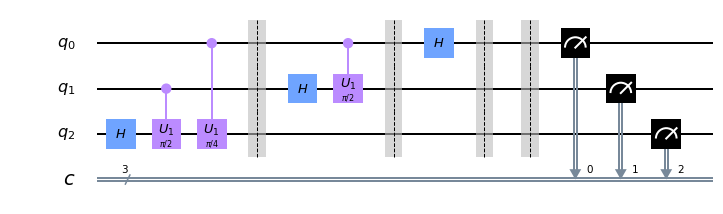

In [36]:
circ_meas = Qsk.QuantumCircuit(n, n)
circ_meas.barrier();
circ_meas.measure(range(n),range(n));
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

### Simulation

In [108]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'001': 114, '011': 133, '010': 133, '000': 139, '110': 124, '101': 133, '111': 127, '100': 121}


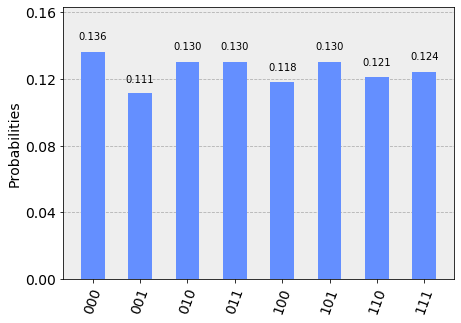

In [109]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Generalization for any N

In [105]:
def qft(Q_R, Q,n):
    """ Method for the Quantum Fourier Transform.
    
    Parameters
    ---------------------------------------------
    Q(QuantumCircuit): Quantum Circuit with N qubits.
    Q_R(QuantumRegister): Quantum Register belonging to Q.
    n(Int): Number of Qubits.
    
    """
    def Rk(QC, Q_CONTROL, Q_TARGET, k, a):
        QC.cu1( a*2.0*np.pi/2.0**k, Q_CONTROL, Q_TARGET);
        
    for i in range(0, n):
        m = n - 1 - i;
        Q.h(Q_R[m]);
        for j in range(m, 0, -1):
            k = 2 + m - j;
            Rk(Q, Q_R[j-1], Q_R[m], k, 1.0);
        Q.barrier();
    j = 0;
    while ( int(n/2) > j ):
        Q.swap( Q_R[j], Q_R[n-1 - j] );
        j = j + 1;
    Q.barrier();

        
def Clas_Measur_Circuit(Q_R,C_R,Q,N):
    """ Method for creating the measurements for
    all qubits.
    
    Parameters
    ---------------------------------------------
    Q(QuantumCircuit): Quantum Circuit with N 
                       qubits.
    Q_R(QuantumRegister): Quantum Register 
                            belonging to Q.
    C_R(QuantumRegister): Classical Register 
                            belonging to Q.
    N(Float): Number of Qubits.
    
    """
    
    Q.barrier();
    Q.measure(Q_R,C_R);
    

## N = 4

### Circuit

In [106]:
N = 4
Q_Reg = Qsk.QuantumRegister(N)
C_Reg = Qsk.ClassicalRegister(N)
Q_Circuit = Qsk.QuantumCircuit(Q_Reg,C_Reg)
qft(Q_Reg, Q_Circuit, N)
Clas_Measur_Circuit(Q_Reg,C_Reg,Q_Circuit,N)

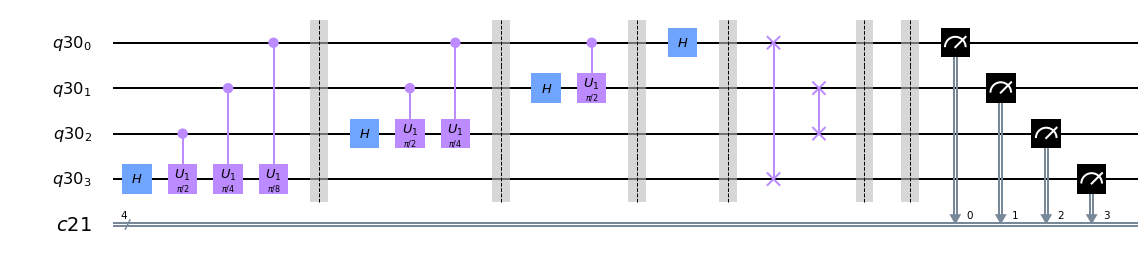

In [107]:
Q_Circuit.draw(output='mpl')

### Simulation

In [99]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(Q_Circuit, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(Q_Circuit)

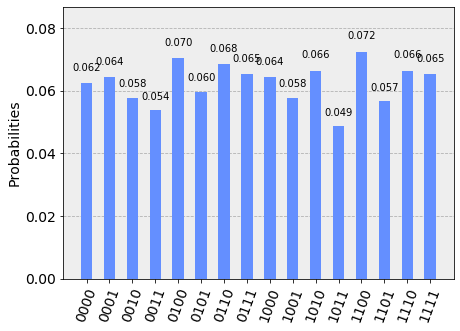

In [100]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

----------------------------------------------------------------------------------------------------

In [110]:
import qiskit.tools.jupyter
%qiskit_version_table